In [1]:
import glob
import os

import pandas as pd

from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_list = glob.glob(os.path.join(os.getcwd(), r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!!Data Science\!Project\News Articles\bbc-fulltext\bbc\business/", "*.txt"))

#all_files = os.listdir(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\Data Science\Project\News Articles\bbc-fulltext\bbc\business/")   # imagine you're one directory above test dir
corpus = []

for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())



data1 = pd.DataFrame(data = corpus, columns = ["Doc Name"])
#data = data.reset_index()
data1["Topic"] = "business"
data1.columns = ["Doc Text", "Topic"]
data1.head()

,Doc Text,Topic
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [3]:
file_list2 = glob.glob(os.path.join(os.getcwd(), r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!!Data Science\!Project\News Articles\bbc-fulltext\bbc\entertainment/", "*.txt"))

#all_files = os.listdir(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\Data Science\Project\News Articles\bbc-fulltext\bbc\business/")   # imagine you're one directory above test dir
corpus2 = []
for file_path in file_list2:
    with open(file_path) as f_input:
        corpus2.append(f_input.read())

data2 = pd.DataFrame(data = corpus2, columns = ["Doc Name"])
#data = data.reset_index()
data2["Topic"] = "entertainment"
data2.columns = ["Doc Text", "Topic"]
data2.head()

,Doc Text,Topic
0,Gallery unveils interactive tree\n\nA Christma...,entertainment
1,Jarre joins fairytale celebration\n\nFrench mu...,entertainment
2,Musical treatment for Capra film\n\nThe classi...,entertainment
3,Richard and Judy choose top books\n\nThe 10 au...,entertainment
4,Poppins musical gets flying start\n\nThe stage...,entertainment


In [4]:
file_list3 = glob.glob(os.path.join(os.getcwd(), r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!!Data Science\!Project\News Articles\bbc-fulltext\bbc\politics/", "*.txt"))

#all_files = os.listdir(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\Data Science\Project\News Articles\bbc-fulltext\bbc\business/")   # imagine you're one directory above test dir
corpus3 = []
for file_path in file_list3:
    with open(file_path) as f_input:
        corpus3.append(f_input.read())

data3 = pd.DataFrame(data = corpus3, columns = ["Doc Name"])
#data = data.reset_index()
data3["Topic"] = "politics"
data3.columns = ["Doc Text", "Topic"]
data3.head()

,Doc Text,Topic
0,Labour plans maternity pay rise\n\nMaternity p...,politics
1,Watchdog probes e-mail deletions\n\nThe inform...,politics
2,Hewitt decries 'career sexism'\n\nPlans to ext...,politics
3,Labour chooses Manchester\n\nThe Labour Party ...,politics
4,Brown ally rejects Budget spree\n\nChancellor ...,politics


In [5]:
file_list4 = glob.glob(os.path.join(os.getcwd(), r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!!Data Science\!Project\News Articles\bbc-fulltext\bbc\sport/", "*.txt"))

#all_files = os.listdir(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\Data Science\Project\News Articles\bbc-fulltext\bbc\business/")   # imagine you're one directory above test dir
corpus4 = []
for file_path in file_list4:
    with open(file_path) as f_input:
        corpus4.append(f_input.read())

data4 = pd.DataFrame(data = corpus4, columns = ["Doc Name"])
#data = data.reset_index()
data4["Topic"] = "sport"
data4.columns = ["Doc Text", "Topic"]
data4.head()

,Doc Text,Topic
0,Claxton hunting first major medal\n\nBritish h...,sport
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,sport
2,Greene sets sights on world title\n\nMaurice G...,sport
3,IAAF launches fight against drugs\n\nThe IAAF ...,sport
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",sport


In [6]:
file_list5 = glob.glob(os.path.join(os.getcwd(), r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!!Data Science\!Project\News Articles\bbc-fulltext\bbc\tech/", "*.txt"))

#all_files = os.listdir(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\Data Science\Project\News Articles\bbc-fulltext\bbc\business/")   # imagine you're one directory above test dir
corpus5 = []
for file_path in file_list5:
    with open(file_path) as f_input:
        corpus5.append(f_input.read())

data5 = pd.DataFrame(data = corpus5, columns = ["Doc Name"])
#data = data.reset_index()
data5["Topic"] = "sport"
data5.columns = ["Doc Text", "Topic"]
data5.head()

,Doc Text,Topic
0,Ink helps drive democracy in Asia\n\nThe Kyrgy...,sport
1,China net cafe culture crackdown\n\nChinese au...,sport
2,Microsoft seeking spyware trojan\n\nMicrosoft ...,sport
3,Digital guru floats sub-$100 PC\n\nNicholas Ne...,sport
4,Technology gets the creative bug\n\nThe hi-tec...,sport


In [7]:
d = [data1, data2, data3, data4,data5]
data = pd.concat(d)
data.to_csv("News.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 400
Data columns (total 2 columns):
Doc Text    2225 non-null object
Topic       2225 non-null object
dtypes: object(2)
memory usage: 52.1+ KB


In [8]:
data["Doc Text"] = data["Doc Text"].str.replace('\n\n', ' ')
data["Doc Text"] = data["Doc Text"].str.replace('[^\w\s]','')
data["Doc Text"] = data["Doc Text"].str.replace('\s+[a-zA-Z]\s+','')
data["Doc Text"] = data["Doc Text"].str.replace('\^[a-zA-Z]\s+','')

data["Doc Text"] = data["Doc Text"].str.replace('\s+',' ')
data.head()

,Doc Text,Topic
0,Ad sales boost Time Warner profit Quarterly pr...,business
1,Dollar gains on Greenspan speech The dollar ha...,business
2,Yukos unit buyer faces loan claim The owners o...,business
3,High fuel prices hit BAs profits British Airwa...,business
4,Pernod takeover talk lifts Domecq Shares in UK...,business


In [9]:
data["Doc Text"] = data["Doc Text"].str.lower()
data.head()

,Doc Text,Topic
0,ad sales boost time warner profit quarterly pr...,business
1,dollar gains on greenspan speech the dollar ha...,business
2,yukos unit buyer faces loan claim the owners o...,business
3,high fuel prices hit bas profits british airwa...,business
4,pernod takeover talk lifts domecq shares in uk...,business


In [10]:
# Install stopwords package
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Print list of stop words
stop_list = stopwords.words('english')
#print(stop_list)

# Remove stop words from text
data["Doc Text"] = data["Doc Text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_list]))
data.head()


,Doc Text,Topic
0,ad sales boost time warner profit quarterly pr...,business
1,dollar gains greenspan speech dollar hit highe...,business
2,yukos unit buyer faces loan claim owners embat...,business
3,high fuel prices hit bas profits british airwa...,business
4,pernod takeover talk lifts domecq shares uk dr...,business


In [12]:
st = PorterStemmer()
data["Doc Text"] = data["Doc Text"].apply(lambda x: " ".join([st.stem(y) for y in x.split()]))
#apply(lambda x: [stemmer.stem(y) for y in x])
data.head()

,Doc Text,Topic
0,ad sale boost time warner profit quarterli pro...,business
1,dollar gain greenspan speech dollar hit highes...,business
2,yuko unit buyer face loan claim owner embattl ...,business
3,high fuel price hit ba profit british airway b...,business
4,pernod takeov talk lift domecq share uk drink ...,business


In [13]:
#data['tokens'] = data["Doc Text"].apply(lambda x: x.split())
#data.head()

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
X = data.iloc[:, :1]
Y = data['Topic']

In [16]:
#y = pd.DataFrame(data = LabelEncoder().fit_transform(Y), columns= ["Topic"])
y = pd.DataFrame(data = Y, columns= ["Topic"])

In [17]:
X.head()


,Doc Text
0,ad sale boost time warner profit quarterli pro...
1,dollar gain greenspan speech dollar hit highes...
2,yuko unit buyer face loan claim owner embattl ...
3,high fuel price hit ba profit british airway b...
4,pernod takeov talk lift domecq share uk drink ...


In [18]:
y.head()

,Topic
0,business
1,business
2,business
3,business
4,business


In [19]:
y["Topic"].value_counts()

sport            912
business         510
politics         417
entertainment    386
Name: Topic, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["Doc Text"])
x1 = tfidf_matrix.toarray()

In [22]:
from sklearn.model_selection import train_test_split
x_train1, x_test, y_train1, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 100)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.2, random_state = 100)

In [23]:
p =pd.DataFrame(data = x_train)
p.head()

p1 =pd.DataFrame(data = x_train1)
p1.head()

t = pd.DataFrame(data = x_test)

In [24]:
x_train.shape

(1424, 39000)

In [58]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

[[ 76   3   2  14]
 [  3  66   1   9]
 [  4   2  80  10]
 [  1   5   1 168]]
0.8764044943820225
0.1235955056179775
[0.9047619  0.86842105 0.95238095 0.8358209 ]
[0.8        0.83544304 0.83333333 0.96      ]
[0.84916201 0.8516129  0.88888889 0.89361702]
0.8708202061411188


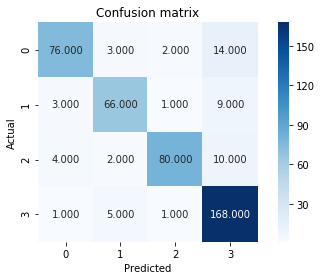

In [61]:
# Naive Bayes with all variables

gb = GaussianNB()
gb.fit(x_train1,y_train1.values.ravel())
y_pred = gb.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

[[ 80   4   1  10]
 [  4  67   2   6]
 [  8   3  79   6]
 [  7  14   4 150]]
0.8449438202247191
0.15505617977528086
[0.80808081 0.76136364 0.91860465 0.87209302]
[0.84210526 0.84810127 0.82291667 0.85714286]
[0.82474227 0.80239521 0.86813187 0.86455331]
0.8399556649687453


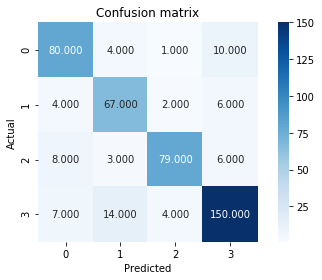

In [62]:
# Decision Tree with all variables

dt = DecisionTreeClassifier()
dt.fit(x_train1,y_train1.values.ravel())
y_pred = dt.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from math import sqrt

In [63]:

features = p.columns
features
bestfeatures = SelectKBest(score_func = f_classif, k=20)
#print(bestfeatures)

fit = bestfeatures.fit(x_train1, y_train1)
col = fit.get_support()
new_features = []
for bool, feature in zip(col, features):
    if bool:
        new_features.append(feature)

#new_features

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [   17    27    28 ... 38973 38976 38979] are constant.
  UserWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [64]:
train = pd.DataFrame(p1, columns=new_features)
train.head()



,3482,6610,9082,9281,10477,11771,13126,15312,20307,20578,20828,22687,23125,23140,26067,30182,31910,34243,34374,37915
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072816
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.015337,0.0,0.0,0.000000,0.0,0.0,0.0,0.070649,0.000000,0.0,0.0,0.0,0.0,0.025317
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.079435,0.0,0.0,0.0,0.050342,0.039177,0.0,0.0,0.0,0.0,0.000000


[[ 41  16   4  34]
 [  2  56   0  21]
 [ 13   2  80   1]
 [ 12  34   1 128]]
0.6853932584269663
0.3146067415730337
[0.60294118 0.51851852 0.94117647 0.69565217]
[0.43157895 0.70886076 0.83333333 0.73142857]
[0.50306748 0.59893048 0.8839779  0.71309192]
0.674766947126014


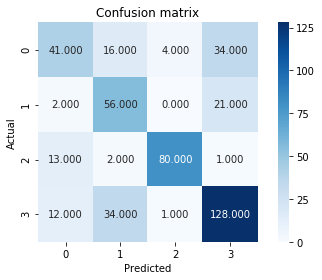

In [65]:
gb = GaussianNB()
gb.fit(train,y_train1.values.ravel())
test = pd.DataFrame(data = t, columns = new_features)
#print(test.columns)
y_pred = gb.predict(test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

[[ 62   4   4  25]
 [  2  51   1  25]
 [ 14   4  75   3]
 [ 29  11   2 133]]
0.7213483146067415
0.27865168539325846
[0.57943925 0.72857143 0.91463415 0.71505376]
[0.65263158 0.64556962 0.78125    0.76      ]
[0.61386139 0.68456376 0.84269663 0.73684211]
0.7194909697511293


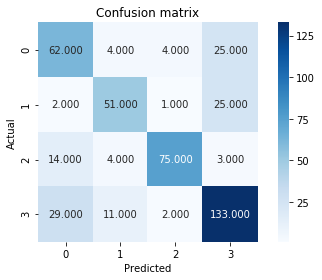

In [66]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train,y_train1.values.ravel())
test = pd.DataFrame(data = t, columns = new_features)
#print(test.columns)
y_pred = dt.predict(test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [32]:
# from sklearn.feature_selection import RFECV

# model = ExtraTreesClassifier()
# rfecv  = RFECV(estimator = model, min_features_to_select = 2)
# rfecv.fit(x_train1,y_train1)

# col = rfecv.support_
# rank = rfecv.ranking_
# rank
# col


# new_features = []
# for bool, feature in zip(col, features):
#     if bool:
#         new_features.append(feature)



In [67]:
# The above feature selection took a lot of time

In [68]:
# train2 = pd.DataFrame(p1, columns=new_features)
# train2.head()



In [40]:
# With Bayesian Optimization and RF

# def objective_func(args):
#     n_estimators = args['n_estimators']
#     max_depth = args['max_depth']
#     min_samples_split = args['min_samples_split']
# #    criterion = args['criterion']
# #    max_features = args['max_features']
#     min_samples_leaf = args['min_samples_leaf']

#     #    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, criterion=criterion, 
#  #                      max_features=max_features,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
 
#     clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_jobs = -1)
    
#     clf.fit(x_train,y_train.values.ravel())    
#     y_pred = clf.predict(x_val)
#     f1 = -(f1_score(y_pred,y_val,  average='macro'))
#     return f1
# space = {'n_estimators': hp.choice('n_estimators', range(200, 1001)), 
#          'max_depth': hp.choice('max_depth', range(20,101)), 
# #         'criterion': hp.choice('criterion',['gini', 'entropy']),
# #         'max_features': hp.choice('max_features', ['auto', 'sqrt']),
#         'min_samples_split': hp.choice('min_samples_split', range(2,11)),
#          'min_samples_leaf' : hp.choice('min_samples_leaf',range(1,5))}
                                
                                
                                
# best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
# print(best_classifier)

In [41]:
# bc = RandomForestClassifier(max_depth = 26,min_samples_leaf = 2, min_samples_split = 3, n_estimators = 175)
# bc.fit(x_train,y_train)
# y_pred = bc.predict(x_test)

# # Compute confusion matrix
# conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# # Plot confusion matrix
# sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion matrix')
# plt.tight_layout()

# # Compute evaluation metrics
# print(metrics.accuracy_score(y_test, y_pred)) # accuracy
# print(1 - metrics.accuracy_score(y_test, y_pred)) # error
# print(metrics.precision_score(y_test, y_pred, average = None)) # precision
# print(metrics.recall_score(y_test, y_pred, average = None)) # recall
# print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
# print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [42]:
# THe above model took a lot of time to run

In [43]:
# WITH LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import sqrt
lda = LinearDiscriminantAnalysis(n_components = None)
x_lda = lda.fit_transform(x_train, y_train.values.ravel())
x_vallda = lda.transform(x_val)
x_testlda = lda.transform(x_test)
x_lda = pd.DataFrame(data = x_lda)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [44]:
# WIth LDA and Random Forest in Bayesian Optimization

def objective_func(args):

    n_estimators = args['n_estimators']
    max_depth = args['max_depth']
    min_samples_split = args['min_samples_split']
#    criterion = args['criterion']
#    max_features = args['max_features']
    min_samples_leaf = args['min_samples_leaf']

    #    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, criterion=criterion, 
 #                      max_features=max_features,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
 
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_jobs = -1)
    
    clf.fit(x_lda,y_train.values.ravel())    
    y_pred = clf.predict(x_vallda)
    f1 = -(f1_score(y_pred,y_val,  average='macro'))
    return f1
space = {'n_estimators': hp.choice('n_estimators', np.arange(200, 1001, step =1)), 
         'max_depth': hp.choice('max_depth', np.arange(20,101, step =1)), 
#         'criterion': hp.choice('criterion',['gini', 'entropy']),
#         'max_features': hp.choice('max_features', ['auto', 'sqrt']),
        'min_samples_split': hp.choice('min_samples_split', np.arange(2,11, step =1)),
         'min_samples_leaf' : hp.choice('min_samples_leaf',np.arange(2,5, step =1))}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

100%|██████████| 100/100 [01:09<00:00,  1.26it/s, best loss: -0.49139885335333944]
{'max_depth': 44, 'min_samples_leaf': 2, 'min_samples_split': 0, 'n_estimators': 21}


In [45]:
# LDA didn't perform well as the variables are collinear

In [48]:
# With PCA
from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# x_pca = pca.fit_transform(x_train)
# x_valpca = pca.transform(x_val)
# x_testpca = pca.transform(x_test)
# print(pca.explained_variance_ratio_)

pca2 = PCA(n_components=3)
x_pca2 = pca2.fit_transform(x_train1)
x_testpca2 = pca2.transform(x_test)
print(pca2.explained_variance_ratio_)

#x_testpca.shape


[0.01258088 0.00915324 0.00805292]


[[ 86   0   2   7]
 [  0  47   1  31]
 [  7   0  86   3]
 [ 33   3   1 138]]
0.802247191011236
0.19775280898876402
[0.68253968 0.94       0.95555556 0.77094972]
[0.90526316 0.59493671 0.89583333 0.78857143]
[0.77828054 0.72868217 0.92473118 0.77966102]
0.8028387283184781


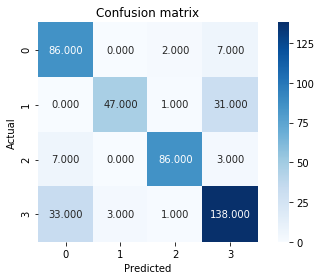

In [49]:
# Naive Bayes with principal components

gb = GaussianNB()
gb.fit(x_pca2,y_train1.values.ravel())
y_pred = gb.predict(x_testpca2)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

[[ 83   2   5   5]
 [  1  75   0   3]
 [  4   3  88   1]
 [ 12   3   3 157]]
0.9056179775280899
0.09438202247191008
[0.83       0.90361446 0.91666667 0.94578313]
[0.87368421 0.94936709 0.91666667 0.89714286]
[0.85128205 0.92592593 0.91666667 0.92082111]
0.9036739395610364


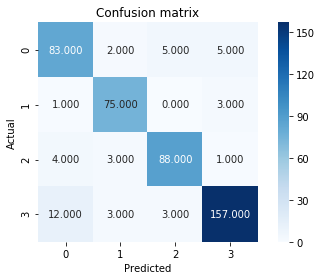

In [50]:
# Decision Tree with principal components

dt = DecisionTreeClassifier()
dt.fit(x_pca2,y_train1.values.ravel())

y_pred = dt.predict(x_testpca2)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [71]:
#Ensemble Methods

In [72]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier


[[ 92   0   0   3]
 [  1  73   0   5]
 [  1   0  88   7]
 [  1   0   1 173]]
0.9573033707865168
0.04269662921348316
[0.96842105 1.         0.98876404 0.92021277]
[0.96842105 0.92405063 0.91666667 0.98857143]
[0.96842105 0.96052632 0.95135135 0.95316804]
0.9583666909623848


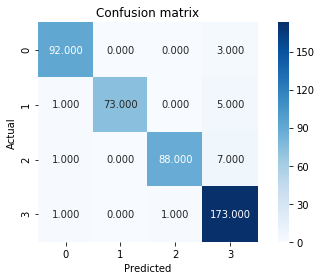

In [73]:
# Random Forest with all variables
bc = RandomForestClassifier(n_estimators = 500)
bc.fit(x_train1,y_train1.values.ravel())
y_pred = bc.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [ ]:
from hyperopt import hp, tpe, Trials, fmin
import numpy as np

In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# WIth PCA and KNN
def objective_func(args):
    n_neighbors = args['n_neighbors']
    metric = args['metric']
    pca = PCA(n_components=args['n'])
    x_pca = pca.fit_transform(x_train)
    x_valpca = pca.transform(x_val)
    x_testpca = pca.transform(x_test)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, n_jobs = -1)
 
    clf.fit(x_pca,y_train.values.ravel())    
    y_pred = clf.predict(x_valpca)
    #print(y_pred)
    #print(set(y_val['Topic']) - set(y_pred))
    f1 = -(f1_score(y_pred,y_val,  average='macro', labels=np.unique(y_pred)))
    return f1
space = {'n_neighbors': hp.choice('n_neighbors',np.arange(1,1000, step =1)),
        'metric':hp.choice('metric', ["euclidean","manhattan"]),
        'n': hp.choice('n', np.arange(3,20, step =1))}

best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

100%|██████████| 100/100 [03:34<00:00,  2.07s/it, best loss: -0.9593973027656143]
{'metric': 1, 'n': 5, 'n_neighbors': 43}


C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[ 89   1   4   1]
 [  1  76   0   2]
 [  1   2  93   0]
 [  2   3   2 168]]
0.9573033707865168
0.04269662921348316
[0.95698925 0.92682927 0.93939394 0.98245614]
[0.93684211 0.96202532 0.96875    0.96      ]
[0.94680851 0.94409938 0.95384615 0.97109827]
0.9539630773155983


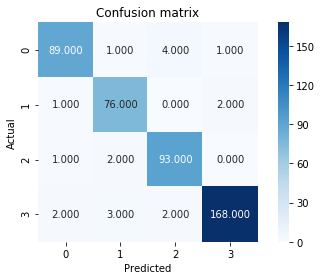

In [79]:
pca = PCA(n_components=best_classifier['n'])
x_pca = pca.fit_transform(x_train)
x_valpca = pca.transform(x_val)
x_testpca = pca.transform(x_test)
bh = KNeighborsClassifier(metric = 'euclidean', n_neighbors= best_classifier['n_neighbors'])
bh.fit(x_pca,y_train)
y_pred = bh.predict(x_testpca)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [84]:
# With PCA, Bayesian Optimization, and Random Forest

def objective_func(args):
    n_estimators = args['n_estimators']
    max_depth = args['max_depth']
    min_samples_split = args['min_samples_split']
    min_samples_leaf = args['min_samples_leaf']
    pca = PCA(n_components=args['n'])
    x_pca = pca.fit_transform(x_train)
    x_valpca = pca.transform(x_val)
    x_testpca = pca.transform(x_test)
 
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_jobs = -1)
    
    clf.fit(x_pca,y_train.values.ravel())    
    y_pred = clf.predict(x_valpca)
    f1 = -(f1_score(y_pred,y_val,  average='macro'))
    return f1
space = {'n_estimators': hp.choice('n_estimators', np.arange(20,1001, step =1)), 
         'max_depth': hp.choice('max_depth', np.arange(20,101, step =1)), 
#         'criterion': hp.choice('criterion',['gini', 'entropy']),
#         'max_features': hp.choice('max_features', ['auto', 'sqrt']),
        'min_samples_split': hp.choice('min_samples_split', np.arange(2,12, step =1)),
         'min_samples_leaf' : hp.choice('min_samples_leaf',np.arange(1,12, step =1)),
        'n': hp.choice('n', np.arange(3,20, step =1))}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

100%|██████████| 100/100 [07:20<00:00,  3.88s/it, best loss: -0.9750413989752008]
{'max_depth': 68, 'min_samples_leaf': 0, 'min_samples_split': 2, 'n': 15, 'n_estimators': 322}


<function <lambda> at 0x00000273652B28C8>


C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[[ 89   3   2   1]
 [  0  79   0   0]
 [  2   1  92   1]
 [  1   0   1 173]]
0.9730337078651685
0.026966292134831482
[0.9673913  0.95180723 0.96842105 0.98857143]
[0.93684211 1.         0.95833333 0.98857143]
[0.95187166 0.97530864 0.96335079 0.98857143]
0.9697756284102655


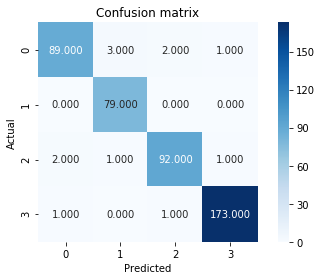

In [97]:
pca = PCA(n_components=best_classifier['n'])
x_pca = pca.fit_transform(x_train)
x_valpca = pca.transform(x_val)
x_testpca = pca.transform(x_test)


c = lambda b : 1 if b == 0 else b
bc = RandomForestClassifier(max_depth = c(best_classifier['max_depth']), min_samples_leaf = c(best_classifier['min_samples_leaf']), min_samples_split = c(best_classifier['min_samples_split'])
                            ,n_estimators = best_classifier['n_estimators'])

bc.fit(x_pca, y_train)

y_pred = bc.predict(x_testpca)
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)


# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [98]:
# Using Light GB

import lightgbm as lgbm
from lightgbm.sklearn import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV


In [99]:

# Using PCA, Random Search, and LGB

param = {
    'n_estimators':np.arange(200,1000, step =1),
    'learning_rate': np.linspace(0.1,0.7, num=7), 
    'max_depth': np.arange(10,1000, step =1),   
     'subsample': np.linspace(0.5,0.8, num=4),
    'min_split_gain': np.arange(0,6, step =1)}

bc1 = LGBMClassifier(objective = 'multiclass', random_state = 101)
rs = RandomizedSearchCV(estimator = bc1, param_distributions = param, n_iter=50,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, random_state=8)

rs.fit(x_pca2, y_train1.values.ravel())

print(rs.best_params_)
print(rs.best_score_)
bcc = rs.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   46.4s finished


{'subsample': 0.7000000000000001, 'n_estimators': 538, 'min_split_gain': 1, 'max_depth': 132, 'learning_rate': 0.6}
0.9151772725085499


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 87   2   5   1]
 [  0  76   0   3]
 [  2   1  91   2]
 [ 10   4   1 160]]
0.9303370786516854
0.06966292134831464
[0.87878788 0.91566265 0.93814433 0.96385542]
[0.91578947 0.96202532 0.94791667 0.91428571]
[0.89690722 0.9382716  0.94300518 0.93841642]
0.9291501062669143


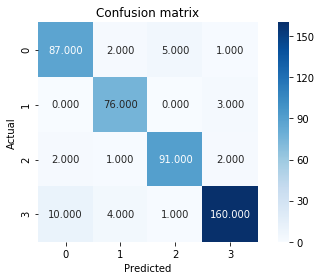

In [100]:

bcc.fit(x_pca2,y_train1)
y_pred = bcc.predict(x_testpca2)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [118]:
# # Using PCA, Bayesian Optimization, and LGB

def objective_func(args):
    n_estimators = args['n_estimators']
    max_depth = args['max_depth']
    min_split_gain = args['min_split_gain']
    learning_rate = args['learning_rate']
    subsample = args['subsample']
    
    pca = PCA(n_components=args['n'])
    x_pca = pca.fit_transform(x_train)
    x_valpca = pca.transform(x_val)
    x_testpca = pca.transform(x_test)
 
    clf = LGBMClassifier(n_estimators = n_estimators, min_split_gain=min_split_gain, subsample=subsample, max_depth= max_depth,learning_rate = learning_rate)
    
    
    clf.fit(x_pca,y_train.values.ravel())    
    y_pred = clf.predict(x_valpca)
    f1 = -(f1_score(y_pred,y_val,  average='macro'))
    return f1
space = {'n_estimators': hp.choice('n_estimators',np.arange(200,1000, step =1)), 
        'min_split_gain': hp.choice('min_split_gain',np.arange(0,10, step =1)),
         'subsample' : hp.uniform('subsample', 0.5, 0.9),
        'max_depth': hp.choice('max_depth',np.arange(10,1000, step =1)),
        'learning_rate': hp.uniform('learning_rate', 0.1, 0.5),
        'n': hp.choice('n', np.arange(3,20, step =1))}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

100%|██████████| 100/100 [04:28<00:00,  2.52s/it, best loss: -0.9660118413363392]
{'learning_rate': 0.1331670486206165, 'max_depth': 825, 'min_split_gain': 0, 'n': 4, 'n_estimators': 550, 'subsample': 0.7742212512437604}


[[ 89   2   3   1]
 [  0  75   0   4]
 [  5   2  89   0]
 [  1   2   3 169]]
0.9483146067415731
0.051685393258426915
[0.93684211 0.92592593 0.93684211 0.97126437]
[0.93684211 0.94936709 0.92708333 0.96571429]
[0.93684211 0.9375     0.93193717 0.96848138]
0.9436901633490483


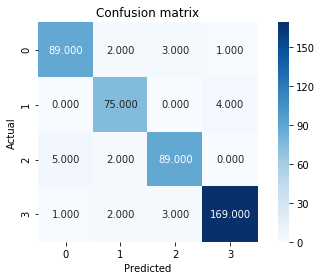

In [121]:
pca = PCA(n_components=best_classifier['n'])
x_pca = pca.fit_transform(x_train)
x_valpca = pca.transform(x_val)
x_testpca = pca.transform(x_test)

c = lambda b : 1 if b == 0 else b
bccbo = LGBMClassifier(learning_rate= best_classifier['learning_rate'], n_estimators = best_classifier['n_estimators'], max_depth= c(best_classifier['max_depth']), 
                       min_split_gain= best_classifier['min_split_gain'], subsample = best_classifier['subsample'])
bccbo.fit(x_pca, y_train.values.ravel())

y_pred = bccbo.predict(x_testpca)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average